***
# <font color="grey">Problem Sheet 2</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$
$\newcommand{\dom}{\mathrm{dom} }$

---
## <font color="grey">Part A</font>
---

### Problem 2.1

Let $\{\vct{x}_k\}_{k\geq 0}$ be a sequence of vectors in $\R^n$ and assume that this sequence converges linearly to some $\vct{x}^*\in \R^n$ with respect to a norm $\norm{\cdot}$,

\begin{equation*}
 \norm{\vct{x}_{k+1}-\vct{x}^*} \leq r\cdot \norm{\vct{x}_k-\vct{x}^*}, \quad k\geq 0,
\end{equation*}

for some constant $r\in (0,1)$. 

(a) Show that for $M=\norm{\vct{x}_0-\vct{x}^*}$, 

\begin{equation*}
  \norm{\vct{x}_k-\vct{x}^*} \leq r^k \cdot M.
 \end{equation*}

(b) Let $\e>0$ be given. Show that if $N$ is an integer such that

\begin{equation*}
 N> \frac{1}{1-r}\left(\ln(M)+\ln\left(\frac{1}{\e}\right)\right),
\end{equation*}

then $\norm{\vct{x}_N-\vct{x}^*}\leq \e$. In words, $N$ iterations are sufficient to reach accuracy $\e$.

(c) Now assume that the sequence converges quadratically,

\begin{equation*}
 \norm{\vct{x}_k-\vct{x}^*}\leq C\norm{\vct{x}_k-\vct{x}^*}^2
\end{equation*}

for some constant $C>0$. Show that

\begin{equation*}
 \norm{\vct{x}_k-\vct{x}^*}\leq C^k \cdot M^{2^k}.
\end{equation*}

How many steps will guarantee a solution up to an error $\e$?

### Problem 2.2

Consider the function

 \begin{equation*}
  f(x) = \sqrt{x^2+1}.
 \end{equation*}

Determine a value $\overline{x}\in \R$ such that

* for $x_0<\overline{x}$, Newton's method converges to a minimizer,
* for $x_0>\overline{x}$, Newton's method does not converge.

What happens if $x_0=\overline{x}$ is chosen as starting point?

### Problem 2.3

Describe a steepest descent method with respect to the norm 

 \begin{equation*}
  \norm{\vct{x}}_{\infty} = \max_{1\leq i\leq n} |x_i|.
 \end{equation*}

What are the descent directions? How can the best descent direction be found?

---
## <font color="grey">Part B</font>
---

### Problem 2.4

Iterative algorithms will never find the exact solution, so it is important to have suitable criteria for stopping an algorithm. Given a tolerance $\e>0$, consider the following candidates for stopping criteria:

(a) $\norm{\vct{x}_{k+1}-\vct{x}_k}<\e$;

(b) $\norm{\nabla f(\vct{x}_k)}<\e$;

(c) $k=100$.

Apply Newton's method for minimizing the function

\begin{equation*}
 f(x) = (x-1)^6
\end{equation*}

with each of the given stopping criteria. Which of these is the most efficient? In general, describe the benefits or disadvantages of each of these stopping criteria. 

### Problem 2.5

When implementing descent algorithms one often uses **backtracking** to select a good step length. Given a descent direction $\vct{p}_k$, one first tries the step length $1$ and then successively scales it down until the *sufficient decrease* condition (see Lecture 4) is satisfied.

Fixing a decrease parameter $c\in (0,1/2)$ and a scaling parameter $s\in (0,1)$, backtracking works as follows.

* $\alpha=1$;
* while $f(\vct{x}_k+\alpha \vct{p}_k) \geq f(\vct{x}_k)+\alpha \cdot c\cdot \ip{\vct{p}_k}{\nabla f(\vct{x}_k)}$: 
     $\displaystyle \alpha = \alpha\cdot s$;
* $\displaystyle \vct{x}_{k+1} = \vct{x}_k+\alpha \vct{p}_k$

Consider the function

\begin{equation*}
 f(\vct{x}) = e^{x_1+3x_2-0.1}+e^{x_1-3x_2-0.1}+e^{-x_1-0.1}
\end{equation*}

on $\R^2$, with level sets given in the contour plot below.
Using the starting point $\vct{x}_0=(-1,0.7)^{\trans}$, plot the trajectory of

(a) Gradient descent with step length $0.1$;

(b) Gradient descent with backtracking, using $c=0.1$ and $s=0.5$;

(c) Newton's method.

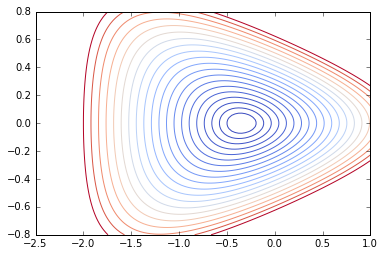

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f and its derivative
def f(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)

def df(x):
    return np.array([np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)-np.exp(-x[0]-0.1), 3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*y[1]-0.1)])

# Get a list of values for specifying the level sets
xvals = np.array([[np.linspace(-2,-0.5,20)], [np.zeros(20)]])
yvals = list(reversed(f(xvals)[0]))

# Create a meshgrid and a contour plot
xx = np.linspace(-2.5,1,100)
yy = np.linspace(-0.8,0.8,100)
X, Y = np.meshgrid(xx, yy)
# The construction inside looks odd: we want to transform the set of input pairs given
# by the meshgrid into a 2 x n array of values that we can apply f to (calling f on such
# an array will apply the function f to each column)
Z = f(np.dstack((X,Y)).reshape((X.size, 2)).transpose())
# the result of applying f is a long list, but we want a matrix
Z = Z.reshape(X.shape)

% matplotlib inline
cmap = plt.cm.get_cmap("coolwarm")
plt.contour(X, Y, Z, yvals, cmap = cmap)
plt.show()

### Problem 2.6

(Logistic Regression.) Let $Y$ be a random variable that satisfies

 \begin{equation*}
  P\{Y=1\} = p, \quad P\{Y=0\} = 1-p.
 \end{equation*}

This random variable models an event with two possible outcomes. The {\em logistic model} for $p$ has the form

\begin{equation*}
 p = \frac{e^{\ip{\vct{a}}{\vct{u}}+b}}{1+e^{\ip{\vct{a}}{\vct{u}}+b}},
\end{equation*}

$\vct{u}\in \R^n$ is a vector of *explanatory variables*, and $\vct{a}\in \R^n, b\in \R$ are the *model parameters* that explain how $p$ depends on the variables. For example, the variable $Y$ could represent a choice in an election and the vector $\vct{u}$ encodes demographic information, or the variable $Y$ could indicate the presence of a disease and $\vct{u}$ encodes data about a patient.

Given vectors $\vct{u}_1,\dots,\vct{u}_m$ and corresponding observed outcomes $y_1,\dots,y_m$, we would like to estimate the parameters $\vct{a}$ and $b$. Assuming the observed outcomes $y_1=\cdots =y_k=1$ and $y_{k+1}=\cdots y_m=0$, the *log likelihood* function is defined as

\begin{equation*}
 \sum_{i=1}^k \ln(p_i) +\sum_{i=k+1}^m \ln(1-p_i),
\end{equation*}

where $p_i$ is the probability computed using $\vct{u}_i$,
and the goal is to find parameters $\vct{a},b$ that maximize this function.

(a) Show that the negative of the log likelihood function is given by

\begin{equation*}
 f(\vct{a},b) = -\sum_{i=1}^k (\ip{\mtx{a}}{\vct{u}_i}+b)+\sum_{i=1}^m\ln\left(1+e^{\ip{\vct{a}}{\vct{u}_i}+b}\right)
 \end{equation*}

Show that the sum of convex functions and the composition of a convex function with a linear one are convex, and deduce that the log likelihood function is convex.

(b) Consider the following table, in which the first row represents the hours of prepration and the second row whether an exam was passed (1) or not (0).

| Hours | 0.5 | 1 | 1.5 | 2 | 2.5 | 3 | 3 | 4.5 | 4 |4.5 | 4.75 | 5 |
| ----- | --- | - | --- | - | --- | - | - | --- | - | -- | ---- | - |
| Pass  |   0 | 0 | 0   | 1 | 0   | 1 | 0 | 1   | 1 | 1  | 1    | 1 |


Find the (negative) log likelihood function $f(a,b)$. Solve the corresponding minimization problem 

\begin{equation*}
 \minimize f(a,b)
\end{equation*}

in two dimensions using either gradiend descent or Newton's method, and plot the resulting probability function, giving the relationship of hours of study to probability of success.